In [29]:
import pandas as pd
import numpy as np

In [30]:
df=pd.read_csv(r'C:\Users\hp\Downloads\Mobile Price Range Prediction\Dataset\mobile_price.csv')

In [31]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [32]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [34]:
corr=df.corr()

In [35]:
corr[['price_range']]

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


In [50]:
x=df.drop(['touch_screen','mobile_wt','clock_speed','price_range'],axis=1)
y=df[['price_range']]

In [51]:
x.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi
0,842,0,0,1,0,7,0.6,2,2,20,756,2549,9,7,19,0,1
1,1021,1,1,0,1,53,0.7,3,6,905,1988,2631,17,3,7,1,0
2,563,1,1,2,1,41,0.9,5,6,1263,1716,2603,11,2,9,1,0
3,615,1,0,0,0,10,0.8,6,9,1216,1786,2769,16,8,11,1,0
4,1821,1,0,13,1,44,0.6,2,14,1208,1212,1411,8,2,15,1,0


In [52]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [55]:
print(x_train.shape)

(1400, 17)


In [56]:
print(x_test.shape)

(600, 17)


In [57]:
print(y_train.shape)

(1400, 1)


In [58]:
print(y_test.shape)

(600, 1)


In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
model=GaussianNB()

In [61]:
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [62]:
y_pred=model.predict(x_test)

In [63]:
model.score(x_test,y_test)*100

78.16666666666666

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [65]:
cf=confusion_matrix(y_test,y_pred)

In [66]:
cf

array([[118,  17,   0,   0],
       [ 13, 107,  29,   0],
       [  0,  30, 120,  18],
       [  0,   1,  23, 124]], dtype=int64)

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

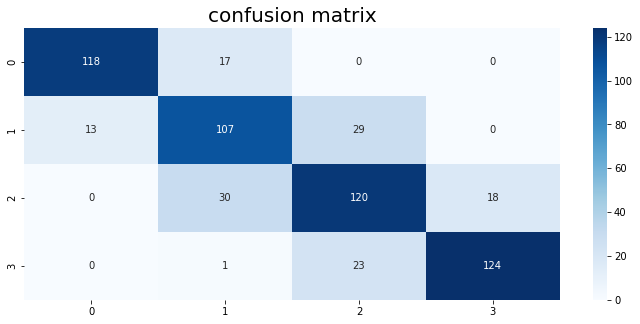

In [68]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('confusion matrix',fontsize=20)
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf=RandomForestClassifier(max_depth=7,criterion='entropy',n_estimators=500)

In [107]:
rf.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Temp/ipykernel_13212/1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500)

In [108]:
rf_pred=rf.predict(x_test)

In [109]:
rf.score(x_test,y_test)*100

87.0

In [110]:
rf.score(x_train,y_train)*100

98.64285714285714

In [102]:
cf=confusion_matrix(y_test,rf_pred)

In [103]:
cf

array([[126,   9,   0,   0],
       [ 13, 122,  14,   0],
       [  0,  17, 142,   9],
       [  0,   0,  12, 136]], dtype=int64)

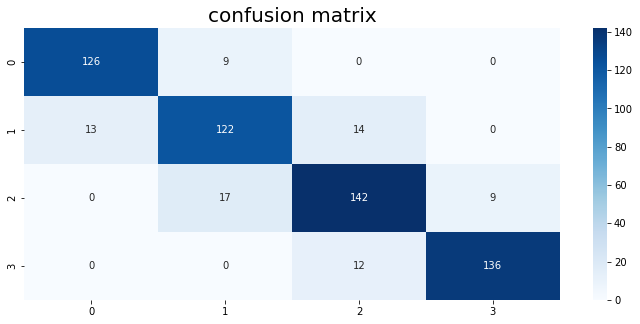

In [104]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('confusion matrix',fontsize=20)
plt.show()

In [111]:
from xgboost import XGBClassifier

In [112]:
model5=XGBClassifier(max_depth=1)

In [113]:
model5.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[12:26:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [114]:
y_pred5=model5.predict(x_test)

In [115]:
accuracy_score(y_test,y_pred5)*100

86.66666666666667

In [116]:
model5.score(x_train,y_train)*100

94.0